<a href="https://colab.research.google.com/github/sangamithraD/DecisionTree_AIML/blob/main/Decision_tree_to_predict_whether_a_customer_buy_a_product.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Saving bank+marketing.zip to bank+marketing (2).zip
‚úÖ Outer zip extracted.
‚úÖ Inner zip (bank.zip) extracted.
‚úÖ Dataset loaded. First 5 rows:


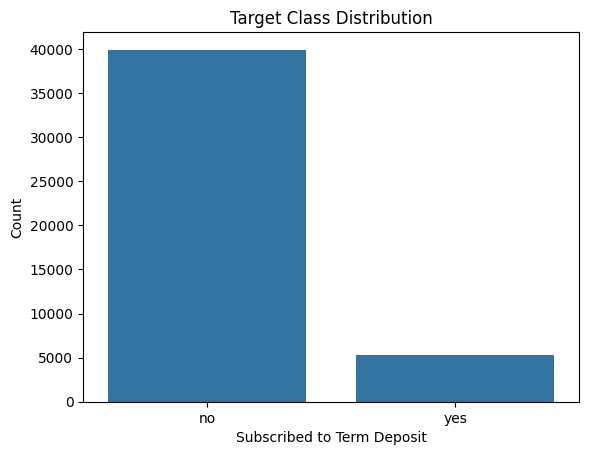

y
no     39922
yes     5289
Name: count, dtype: int64
‚úÖ Categorical encoding complete.
Train size: 36168, Test size: 9043
‚úÖ Model trained.

üéØ Accuracy: 0.8893

üìÑ Classification Report:
              precision    recall  f1-score   support

          No       0.91      0.97      0.94      7985
         Yes       0.56      0.26      0.35      1058

    accuracy                           0.89      9043
   macro avg       0.73      0.62      0.65      9043
weighted avg       0.87      0.89      0.87      9043



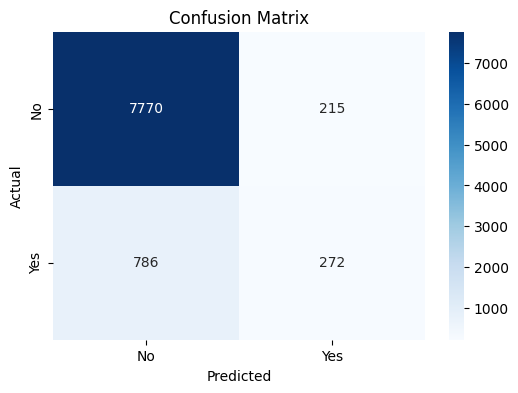

/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 127795 (\N{DECIDUOUS TREE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


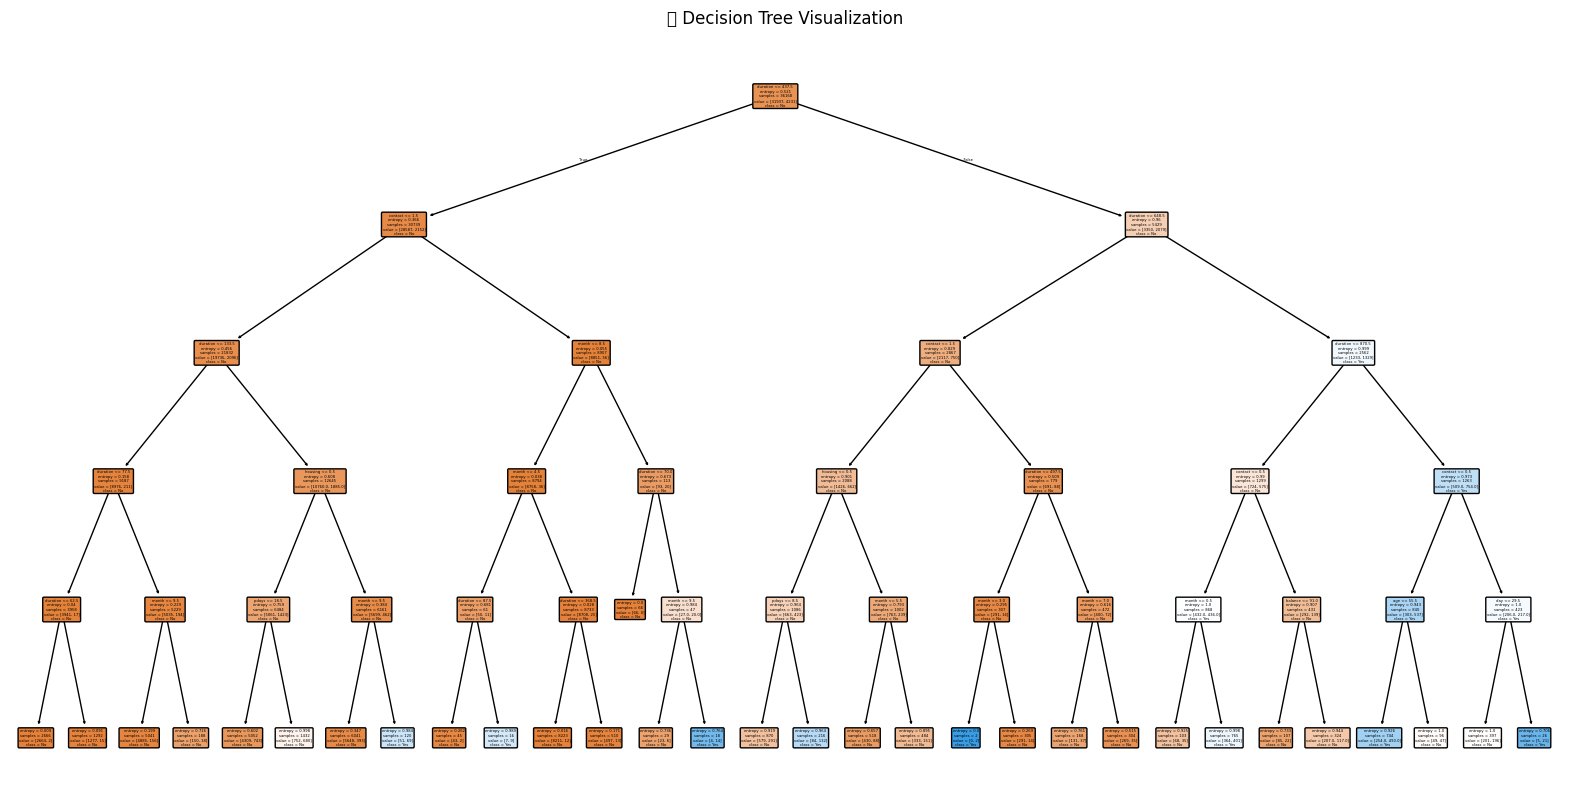

In [ ]:
# ----------------------------------------------
# üìå Week 3 Project: Decision Tree Classifier
# üóÇÔ∏è Handle Nested ZIPs & Load Dataset
# ----------------------------------------------

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import zipfile
import os
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
# ‚úÖ Step 1: Upload Outer ZIP File
from google.colab import files
uploaded = files.upload()
# ‚úÖ Step 2: Extract 'bank+marketing.zip' (contains two inner zips)
outer_zip_path = "bank+marketing.zip"

with zipfile.ZipFile(outer_zip_path, 'r') as outer_zip:
    outer_zip.extractall("outer_extracted")

print("‚úÖ Outer zip extracted.")
# ‚úÖ Step 3: Extract 'bank.zip' (contains bank-full.csv)
inner_zip_path = "outer_extracted/bank.zip"

with zipfile.ZipFile(inner_zip_path, 'r') as inner_zip:
    inner_zip.extractall("bank_data")
print("‚úÖ Inner zip (bank.zip) extracted.")
# ‚úÖ Step 4: Load Dataset
df = pd.read_csv("bank_data/bank-full.csv", sep=';')
print("‚úÖ Dataset loaded. First 5 rows:")
df.head()
# ‚úÖ Step 5: Visualize Target Distribution
sns.countplot(x='y', data=df)
plt.title("Target Class Distribution")
plt.xlabel("Subscribed to Term Deposit")
plt.ylabel("Count")
plt.show()

print(df['y'].value_counts())
# ‚úÖ Step 6: Label Encode Categorical Variables
df_encoded = df.copy()
label_encoders = {}

for col in df_encoded.select_dtypes(include='object').columns:
    le = LabelEncoder()
    df_encoded[col] = le.fit_transform(df_encoded[col])
    label_encoders[col] = le

print("‚úÖ Categorical encoding complete.")
df_encoded.head()
# ‚úÖ Step 7: Train-Test Split
X = df_encoded.drop('y', axis=1)
y = df_encoded['y']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

print(f"Train size: {X_train.shape[0]}, Test size: {X_test.shape[0]}")
# ‚úÖ Step 8: Train Decision Tree Model
model = DecisionTreeClassifier(criterion='entropy', max_depth=5, random_state=42)
model.fit(X_train, y_train)
print("‚úÖ Model trained.")
# ‚úÖ Step 9: Evaluate Model
y_pred = model.predict(X_test)

print(f"\nüéØ Accuracy: {accuracy_score(y_test, y_pred):.4f}")
print("\nüìÑ Classification Report:")
print(classification_report(y_test, y_pred, target_names=["No", "Yes"]))

cm = confusion_matrix(y_test, y_pred)

# Confusion Matrix Heatmap
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=["No", "Yes"], yticklabels=["No", "Yes"])
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()
# ‚úÖ Step 10: Visualize the Decision Tree
plt.figure(figsize=(20, 10))
plot_tree(model, filled=True, feature_names=X.columns, class_names=["No", "Yes"], rounded=True)
plt.title("üå≥ Decision Tree Visualization")
plt.show()